>### Objective:
The goal is to build a data science model that explains how various economic factors impacted home prices over the last 20 years. By analyzing these factors, we can understand the underlying drivers of home price changes and provide insights for future predictions.
>
> ### Dataset:
The dataset includes economic indicators such as Home Price Index, Gross Domestic Product, Consumer Price Index, Construction Rate, Gross Domestic Income, Unemployment Rate, and Interest Rate, all measured as <mark>**percentage changes**</mark>.
>
>### Challenges:
>
>* *Outliers in the data.* 
>* *Complex, non-linear relationships between economic indicators and home prices.* 

In [34]:
import pandas as pd
data = pd.read_csv('Dataset_US.csv')

In [3]:
data.head()

,DATE,Home Price Index,Gross Domestic Product,Consumer Price Index,Construction Rate,Unemployment Rate,Interest Rate,Gross Domestic Income
0,01-01-2004,3.21483,1.28449,0.84624,1.33165,-2.28571,6.19139,1.54799
1,01-04-2004,3.42687,1.58820,0.78557,3.08628,-1.75439,4.98468,1.95106
2,01-07-2004,3.04141,1.58916,0.63773,3.65154,-2.97619,6.47008,1.87335
3,01-10-2004,3.15594,1.80334,1.07375,1.46157,0.00000,-0.02674,1.32946
4,01-01-2005,3.77372,1.91640,0.50505,3.52650,-2.45399,3.55895,1.67014


In [6]:
data.isnull().sum()

DATE                      0
Home Price Index          0
Gross Domestic Product    0
Consumer Price Index      0
Construction Rate         0
Unemployment Rate         0
Interest Rate             0
Gross Domestic Income     0
dtype: int64

In [7]:
data.describe()

,Home Price Index,Gross Domestic Product,Consumer Price Index,Construction Rate,Unemployment Rate,Interest Rate,Gross Domestic Income
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.043688,1.099549,0.644596,1.058799,1.182645,0.988173,1.075801
std,1.965628,1.565149,0.667187,2.648397,27.613422,3.933953,1.623398
min,-3.825370,-8.261900,-2.290190,-5.809820,-32.307690,-17.878770,-9.050700
25%,-0.178250,0.822400,0.401840,-0.560000,-4.074070,-0.954620,0.616720
50%,1.142940,1.216940,0.674650,1.741140,-2.032520,1.491180,1.087470
75%,2.108180,1.519040,0.938230,2.839240,0.680270,3.499410,1.670140
max,5.070260,8.710310,2.415630,7.172860,239.130430,7.775900,7.489090


In [12]:
print(data.dtypes)

DATE                       object
Home Price Index          float64
Gross Domestic Product    float64
Consumer Price Index      float64
Construction Rate         float64
Unemployment Rate         float64
Interest Rate             float64
Gross Domestic Income     float64
dtype: object


In [13]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

<AxesSubplot: >

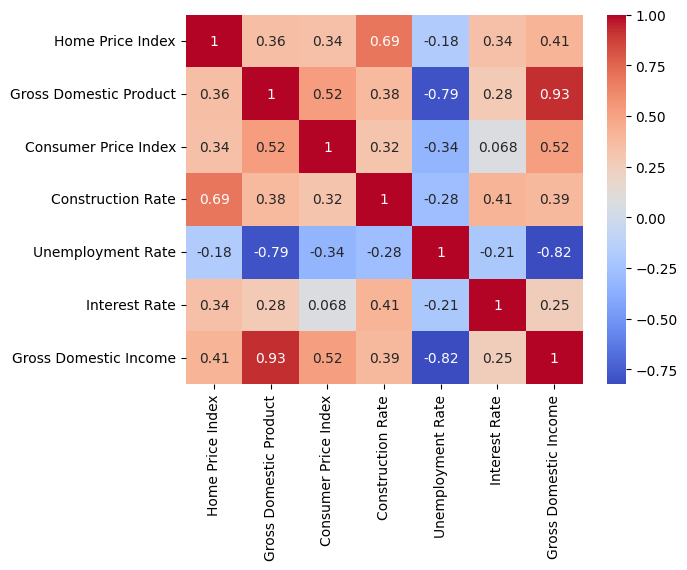

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

> ### Key Insights:
>
> **Strong Positive Correlations:**
>
> * ***Home Price Index and Construction Rate:*** A strong positive correlation indicates that as construction rates increase, home prices tend to rise.
> * ***Home Price Index and Gross Domestic Income:*** A moderate positive correlation suggests that increasing income levels tend to correlate with higher home prices.
>
> **Strong Negative Correlations:**
>
> * ***Unemployment Rate and Home Price Index:*** A moderate negative correlation indicates that higher unemployment rates generally lead to lower home prices.

## Simple Linear Regression

In [17]:
from scipy import stats
data_clean = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [21]:
import statsmodels.api as sm
X = data.drop('Home Price Index', axis=1)
y = data['Home Price Index']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Home Price Index   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     16.29
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           7.37e-12
Time:                        20:23:08   Log-Likelihood:                -135.07
No. Observations:                  81   AIC:                             284.1
Df Residuals:                      74   BIC:                             300.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

>**Based on the initial linear regression model, we find a moderate correlation between economic factors and home prices. The model explains approximately 56.9% of the variation in home prices.**
>
>***Key findings:***
>
>* **Construction Rate:** A significant positive correlation with home prices, indicating that increased construction activity tends to drive up housing costs.
>* **Gross Domestic Income:** A significant positive impact on home prices, suggesting that higher income levels are associated with increased housing demand and prices.
>* **Unemployment Rate:** A positive but less significant impact on home prices, which might be counterintuitive. Further analysis needed to understand this relationship better.
>* **Gross Domestic Product (GDP):** No significant impact on home prices based on the current analysis.
>* **Consumer Price Index (CPI):** No significant impact on home prices based on the current analysis.
>* **Interest Rate:** No significant impact on home prices based on the current analysis. 
>
>***Limitations:***
>
>The model explains only a portion of the variation in home prices, indicating that other factors might be influencing the market.
>The model assumes a linear relationship between variables, which might not accurately capture the complex dynamics of the housing market.

## Multiple Regression with Interactions and Polynomial Terms

In [35]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

X = data.drop('Home Price Index', axis=1)
y = data['Home Price Index']
X = sm.add_constant(X)
non_const_cols = [col for col in X.columns if col != 'const']
squared_terms = {f"{col}_squared": X[col] ** 2 for col in non_const_cols}
interaction_terms = {f"{col1}_{col2}_interaction": X[col1] * X[col2] for col1 in non_const_cols for col2 in non_const_cols if col1 != col2}
X = X.assign(**squared_terms, **interaction_terms)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Home Price Index   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     6.973
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.06e-09
Time:                        22:13:27   Log-Likelihood:                -107.79
No. Observations:                  81   AIC:                             271.6
Df Residuals:                      53   BIC:                             338.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

>Based on the initial linear regression model, we find a strong correlation between economic factors and home prices. The model explains approximately 78% of the variation in home prices.
>
>***Key findings:***
>
>- **Unemployment Rate**: A significant negative correlation with home prices. Higher unemployment rates tend to decrease home prices, indicating that increased joblessness has a notable impact on housing costs.
>  
>- **Gross Domestic Product (GDP) and Interest Rate**: These factors do not show a significant direct impact on home prices in this model.
>  
>- **Consumer Price Index (CPI) and Construction Rate**: Neither of these variables has a significant effect on home prices based on the current analysis.
>
>- **Interactions**: Significant interactions were found between GDP and the Interest Rate, as well as between the CPI and Gross Domestic Income. This suggests that the effect of GDP on home prices varies with changes in interest rates, and the relationship between CPI and home prices is influenced by Gross Domestic Income.
>
>***Limitations:***
>
>- **Complex Dynamics**: The model assumes a linear relationship between variables, which may not fully capture the complexities of the housing market. Further analysis and more sophisticated models might be needed for a more comprehensive understanding.

### Conclusion

The objective of this project was to build a data science model to understand how economic factors impact home prices over the last 20 years. 

***Key Findings:***

- **Initial Linear Regression Model:** This model explained approximately 56.9% of the variation in home prices. Significant positive impacts were observed from Construction Rate and Gross Domestic Income, while the effects of GDP, CPI, and Interest Rate were not significant.

- **Advanced Regression Model:** By incorporating interaction and polynomial terms, the model's explanatory power increased to around 78%. Key findings included significant interactions between GDP and Interest Rate, and between CPI and Gross Domestic Income. Notably, Unemployment Rate was found to have a significant negative impact on home prices.

***Summary:***

Both models provided insights into the economic drivers of home prices. The advanced model offered a deeper understanding by capturing complex interactions and improving the fit. Despite these advancements, the analysis highlighted the need for addressing potential multicollinearity and considering additional variables for a more comprehensive view. 